# Downloading data

In [6]:
# !pip install gdown --upgrade
# !gdown 1qHQ9BUmhJoDLZ40PaVJENmNJyT1_8M8C
# !unzip release-youtube-links.zip
# !rm release-youtube-links.zip
# !wget https://snap.stanford.edu/data/bigdata/communities/com-youtube.ungraph.txt.gz
# !gzip -d com-youtube.ungraph.txt.gz
!wget https://snap.stanford.edu/data/bigdata/communities/com-youtube.all.cmty.txt.gz
!gzip -d com-youtube.all.cmty.txt.gz
!wget https://snap.stanford.edu/data/bigdata/communities/com-youtube.top5000.cmty.txt.gz
!gzip -d com-youtube.top5000.cmty.txt.gz

--2022-03-19 08:24:14--  https://snap.stanford.edu/data/bigdata/communities/com-youtube.all.cmty.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80, 198.41.0.4, 199.9.14.201, ...
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341486 (333K) [application/x-gzip]
Saving to: ‘com-youtube.all.cmty.txt.gz’

com-youtube.all.cmt 100%[===================>] 333.48K  52.9KB/s    in 6.3s    

2022-03-19 08:24:25 (52.9 KB/s) - ‘com-youtube.all.cmty.txt.gz’ saved [341486/341486]

--2022-03-19 08:24:26--  https://snap.stanford.edu/data/bigdata/communities/com-youtube.top5000.cmty.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80, 198.41.0.4, 199.9.14.201, ...
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195662 (191K) [application/x-gzip]
Saving to: ‘com-youtube.top5000.cmty.txt

# Imports

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Creating graph

In [28]:
G = nx.Graph()
lines = []
lines_minus_one = []
with open('release-youtube-users.txt') as f:
    lines = f.readlines()
for line in lines:
    G.add_node(int(line)-1) 
    lines_minus_one.append(f"{int(line)-1}\n")
with open('release-youtube-users-m1.txt', 'w') as f:
    f.writelines(lines_minus_one)
lines_minus_one = []
with open('release-youtube-links.txt') as f:
    lines = f.readlines()
for line in lines:
    link = line.split()
    G.add_edge(int(link[0])-1, int(link[1])-1)
    lines_minus_one.append(f"{int(link[0])-1}\t{int(link[1])-1}\n")
with open('release-youtube-links-m1.txt', 'w') as f:
    f.writelines(lines_minus_one)

In [8]:
lines_minus_one = []
with open('com-youtube.all.cmty.txt') as f:
    lines = f.readlines()
for line in lines:
    link = line.split()
    elements_m1 = [int(element) - 1 for element in link]
    string_to_write = f"{elements_m1[0]}"
    for k in range(1, len(elements_m1)):
        string_to_write = string_to_write + f"\t{elements_m1[k]}"
    string_to_write = string_to_write + '\n'
    lines_minus_one.append(string_to_write)
with open('com-youtube.all.cmty.txt', 'w') as f:
    f.writelines(lines_minus_one)

# Exploring the graph

In [5]:
G = nx.read_edgelist("com-youtube.txt")

print(f"There are {len(G.nodes())} users")
print(f"There are {len(G.edges())} relations")
print(f"There is {nx.number_connected_components(G)} connected components")
largest_cc = max(nx.connected_components(G), key=len)
G = G.subgraph(largest_cc).copy()
print(f"There are {len(G.nodes())} users in the greatest connected component")
print(f"There are {len(G.edges())} relations in the greatest connected component")
print(f"There is {nx.number_connected_components(G)} connected components")

There are 1134890 users
There are 2987624 relations
There is 1 connected components
There are 1134890 users in the greatest connected component
There are 2987624 relations in the greatest connected component
There is 1 connected components


In [6]:
nx.write_edgelist(G, "com-youtube-connected")

# Exploring community data

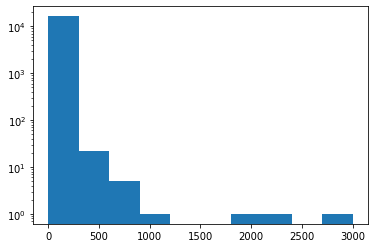

In [10]:
import matplotlib.pyplot as plt

size_of_community = []
with open('com-youtube.all.cmty.txt') as f:
    lines = f.readlines()
for line in lines:
    link = line.split()
    size_of_community.append(len(link))
plt.hist(size_of_community, bins=10)
plt.yscale('log')
plt.show()

# Counting number of people in community aggregations

**Be careful : We do not take into account thatr people can belong to several communities at the same time**

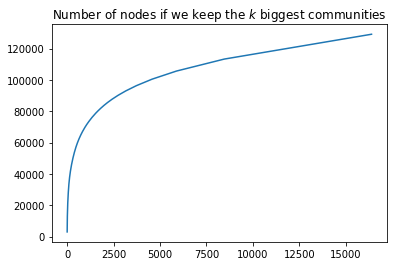

In [7]:
import matplotlib.pyplot as plt

size_of_community = []
with open('com-youtube.all.cmty.txt') as f:
    lines = f.readlines()
for line in lines:
    link = line.split()
    size_of_community.append(len(link))
size_of_community = np.array(size_of_community)
size_of_community[::-1].sort()
size_of_community_cumsum = np.cumsum(size_of_community)
plt.plot(size_of_community_cumsum)
plt.title("Number of nodes if we keep the $k$ biggest communities")
plt.show()

Let's say we want to keep at most a certain number of nodes to reduce computational load.

In [8]:
limit = 50000
for i in range(len(size_of_community_cumsum) - 1):
    if size_of_community_cumsum[i] <= limit and size_of_community_cumsum[i+1] > limit:
        print(f"To keep {limit} nodes, we will have to keep the {i} biggest communities.")
        break

To keep 50000 nodes, we will have to keep the 308 biggest communities.


Now, we plot the number of communities kept depending on the wanted limit.

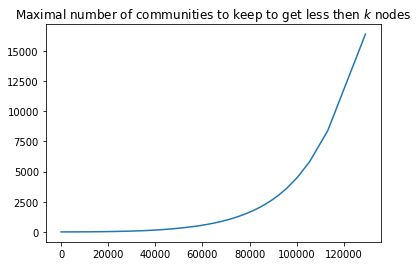

In [12]:
communities_to_keep = [0]
for limit in range(1, np.amax(size_of_community_cumsum)):
    for i in range(communities_to_keep[-1], len(size_of_community_cumsum) - 1):
        if size_of_community_cumsum[i] <= limit and size_of_community_cumsum[i+1] > limit:
            communities_to_keep.append(i)
            break
        elif size_of_community_cumsum[i] > limit:
            communities_to_keep.append(i - 1)
            break
plt.plot(communities_to_keep)
plt.title("Maximal number of communities to keep to get less then $k$ nodes")
plt.show()

In [13]:
limit = 50000
print(f"To keep {limit} nodes, we will have to keep the {communities_to_keep[limit]} biggest communities.")

To keep 50000 nodes, we will have to keep the 308 biggest communities.


# Keeping a certain number of communities

In [7]:
limit = 308

Collecting the indexes of nodes to keep and preparing them for renaming (we will need a graph with node indexing in $[[0,N-1]]$).

In [8]:
number_of_nodes_in_raw_community = []
with open('com-youtube.all.cmty.txt') as f:
    raw_communities = f.readlines()
for line in raw_communities:
    link = line.split()
    number_of_nodes_in_raw_community.append(len(link))
number_of_nodes_in_raw_community = np.array(number_of_nodes_in_raw_community)
number_of_nodes_in_raw_community_sorted = number_of_nodes_in_raw_community.copy()
number_of_nodes_in_raw_community_sorted[::-1].sort()
print(f"The biggest community to keep has {number_of_nodes_in_raw_community_sorted[limit-1]} nodes.")
unique_indexes = set()
for line in raw_communities:
    link = line.split()
    if len(link) >= 52:
        for element in link:
            unique_indexes.add(element)
print(f"We finally keep {len(unique_indexes)} nodes.")

The biggest community to keep has 52 nodes.
We finally keep 25053 nodes.


We now rename the nodes so it verifies the indexing requirements of most algorithms.

In [9]:
unique_indexes_list = list(unique_indexes)
new_indexes_list = [i for i in range(len(unique_indexes_list))]
conversion_dict = dict()
for i in range(len(unique_indexes_list)):
    conversion_dict[unique_indexes_list[i]] = new_indexes_list[i]

In [10]:
pruned_communities = []
for line in raw_communities:
    link = line.split()
    if len(link) >= 52 and len(pruned_communities) < limit:
        pruned_communities.append(line)
print(f"Keeping {len(pruned_communities)} communities.")

Keeping 308 communities.


Now, we have all the information to write files for the pruned network.

In [14]:
lines = []
for node in new_indexes_list:
    lines.append(f"{int(node)}\n")
with open('./pruned_youtube/release-youtube-users.txt', 'w') as f:
    f.writelines(lines)
edges = []
with open('release-youtube-links.txt') as f:
    lines = f.readlines()
for line in lines:
    link = line.split()
    if link[0] in unique_indexes and link[1] in unique_indexes:
        edges.append(f"{conversion_dict[link[0]]}\t{conversion_dict[link[1]]}\n")
with open('./pruned_youtube/release-youtube-links.txt', 'w') as f:
    f.writelines(edges)
lines = []
groups = [i + 1 for i in range(limit)]
for group in groups:
    lines.append(f"{int(group)}\n")
with open('./pruned_youtube/release-youtube-groups.txt', 'w') as f:
    f.writelines(lines)
pruned_renamed_communities = []
for community in pruned_communities:
    link = community.split()
    for i in range(len(link)):
        link[i] = conversion_dict[link[i]]
    string_to_write = f"{link[0]}"
    for i in range(1, len(link)):
        string_to_write += f"\t{link[i]}"
    string_to_write += '\n'
    pruned_renamed_communities.append(string_to_write)
with open('./pruned_youtube/release-youtube.cmty.txt', 'w') as f:
    f.writelines(pruned_renamed_communities)

We now load the pruned data and make it connected.

In [15]:
G = nx.read_edgelist("./pruned_youtube/release-youtube-links.txt")

print(f"There are {len(G.nodes())} users")
print(f"There are {len(G.edges())} relations")
print(f"There is {nx.number_connected_components(G)} connected components")
largest_cc = max(nx.connected_components(G), key=len)
G = G.subgraph(largest_cc).copy()
print(f"There are {len(G.nodes())} users in the greatest connected component")
print(f"There are {len(G.edges())} relations in the greatest connected component")
print(f"There is {nx.number_connected_components(G)} connected components")

There are 13736 users
There are 41365 relations
There is 205 connected components
There are 13232 users in the greatest connected component
There are 41011 relations in the greatest connected component
There is 1 connected components


In [27]:
nodes = G.nodes()
nodes = np.array(nodes).astype('int')
nodes_set = set(nodes)
nodes_new = np.array([i for i in range(nodes.shape[0])])
conversion_dict = dict()
for i in range(nodes.shape[0]):
    conversion_dict[str(nodes[i])] = nodes_new[i]
edges = G.edges()
edges = np.array(edges).astype('int')

In [39]:
lines = []
for node in nodes_new:
    lines.append(f"{node}\n")
with open('./pruned_connected_youtube/release-youtube-users.txt', 'w') as f:
    f.writelines(lines)
G = nx.relabel_nodes(G, conversion_dict)
nx.write_edgelist(G, './pruned_connected_youtube/release-youtube-links.txt')
communities = []
with open('./pruned_youtube/release-youtube.cmty.txt') as f:
    raw_communities = f.readlines()
for line in raw_communities:
    link = line.split()
    communities.append(link)
for i in range(len(communities)):
    for j in range(len(communities[i])):
        try:
            communities[i][j] = conversion_dict[communities[i][j]]
        except:
            communities[i][j] = ''
for i in range(len(communities)):
    communities[i] = list(filter(lambda a: a != '', communities[i]))
unique_indexes = set()
for i in range(len(communities)):
    for j in range(len(communities[i])):
        unique_indexes.add(communities[i][j])
pruned_renamed_communities = []
for community in communities:
    string_to_write = f"{community[0]}"
    for i in range(1, len(community)):
        string_to_write += f"\t{community[i]}"
    string_to_write += '\n'
    pruned_renamed_communities.append(string_to_write)
with open('./pruned_connected_youtube/release-youtube.cmty.txt', 'w') as f:
    f.writelines(pruned_renamed_communities)

# Getting the average community belonging

In [1]:
import numpy as np

with open("./pruned_connected_youtube/release-youtube.cmty.txt") as f:
    ground_truth = f.readlines()
for i in range(len(ground_truth)):
    ground_truth[i] = ground_truth[i].split()
    for j in range(len(ground_truth[i])):
        ground_truth[i][j] = int(ground_truth[i][j])
    ground_truth[i] = set(ground_truth[i])

In [23]:
complete_set = set()
for i in range(len(ground_truth)):
    complete_set = complete_set.union(ground_truth[i])
print(f"There are {len(complete_set)} users and {len(ground_truth)} communities.")

There are 13210 users and 308 communities.


In [10]:
ground_truth_list = []
for i in range(len(ground_truth)):
    ground_truth_list.append(list(ground_truth[i]))
all_users = list(complete_set)
new_indexes = [i for i in range(len(all_users))]
conv_dict = dict()
for i in range(len(all_users)):
    conv_dict[all_users[i]] = i
belongings = [0 for _ in range(len(all_users))]
for i in range(len(ground_truth_list)):
    for j in range(len(ground_truth_list[i])):
        belongings[conv_dict[ground_truth_list[i][j]]] += 1

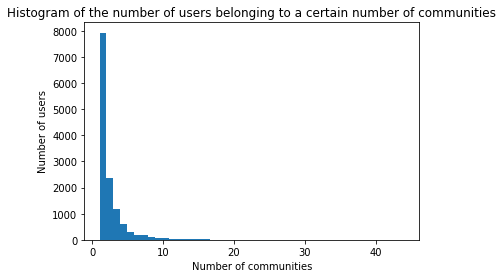

In [18]:
import matplotlib.pyplot as plt

plt.hist(belongings, bins=44)
plt.title("Histogram of the number of users belonging to a certain number of communities")
plt.xlabel("Number of communities")
plt.ylabel("Number of users")
plt.show()

In [15]:
print(f"In average, users belong to {np.mean(belongings)} communities.")

In average, users belong to 2.1713853141559425 communities.


In [22]:
count = 0
limit = 2
for b in belongings:
    if b >= limit:
        count += 1
print(f"{100*count/len(belongings)}% of users belong to {limit} or more communities.")

40.0227100681302% of users belong to 2 or more communities.


2
1494


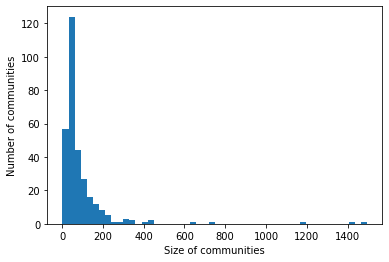

In [28]:
len_of_communities = []
for i in range(len(ground_truth)):
    len_of_communities.append(len(ground_truth[i]))
print(np.amin(len_of_communities))
print(np.amax(len_of_communities))
plt.hist(len_of_communities, bins=50)
plt.xlabel("Size of communities")
plt.ylabel("Number of communities")
plt.show()